In [1]:
pip install simpletransformers==0.63.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=332365f56070694ddab8eea93e9c22bface5044def92b14c3c9c5f186c03f10a
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from simpletransformers.t5 import T5Model, T5Args
from torch import cuda

2024-03-13 00:52:24.160917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 00:52:24.161027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 00:52:24.291845: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
pip install -U pythainlp pythainlp[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 64.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 17.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 MB 17.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pythainlp.util import normalize

In [10]:
df = pd.read_csv('/kaggle/input/working/finalfinal.csv', sep=',', names=['text', 'categories'], header=None)
df

,text,categories
0,อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...,Value
1,อยากให้มีรถเข็นขนาดเล็กไว้บริการ,Convenience
2,อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...,Convenience
3,พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง,Environs
4,อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...,Environs
...,...,...
1461,พนักงานไม่ยิ้มแย้ม หน้าบูด เวลาให้บริการ ควรมี...,Cashier
1462,พนักงานคิดเงินไม่ถูกต้อง ควรมีความรอบคอบ ระมัด...,Staff
1463,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,Cashier
1464,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,Cashier


<Axes: xlabel='categories'>

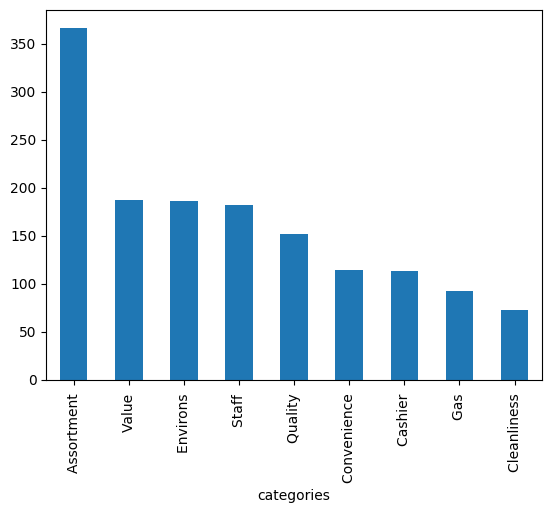

In [8]:
df['categories'].value_counts().plot.bar()

In [11]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['พวกกัน',
 'สิ้นกาลนาน',
 'นำมา',
 'เป็นอันมาก',
 'ค่อย',
 'ไม่',
 'ทำไม',
 'เมื่อคืน',
 'ขาด',
 'นิดๆ',
 'นั้นๆ',
 'ที่แล้ว',
 'จ๋า',
 'ซึ่งๆ',
 'เหตุนี้',
 'คำ',
 'ขึ้น',
 'คราวไหน',
 'จัดหา',
 'แยะ',
 'ร่วมมือ',
 'สั้น',
 'เห็นแก่',
 'ไหนๆ',
 'ซึ่งกันและกัน',
 'ซะ',
 'ช่วงระหว่าง',
 'พอกัน',
 'ด้วยเหตุนั้น',
 'ด้วยเหตุว่า',
 'ไง',
 'บางขณะ',
 'ไม่ใช่',
 'พบว่า',
 'ภายภาค',
 'หมดสิ้น',
 'อันใด',
 'แต่',
 'จะได้',
 'นี่เอง',
 'หากแม้น',
 'แต่เมื่อ',
 'ส่วนด้อย',
 'เชื่อมั่น',
 'สิ่ง',
 'ขณะนั้น',
 'ส่วนใหญ่',
 'เท่าใด',
 'ที่ๆ',
 'จนแม้',
 'ก็จะ',
 'แค่นั้น',
 'ทุกทาง',
 'ตลอดทั้ง',
 'มา',
 'ต่างก็',
 'ด้วยเหตุนี้',
 'ผล',
 'ใหม่ๆ',
 'ครั้งหลังสุด',
 'หรือ',
 'จริงจัง',
 'ปัจจุบัน',
 'ประการหนึ่ง',
 'คุณๆ',
 'คราวๆ',
 'ถึงบัดนั้น',
 'ตามด้วย',
 'ซะจนกระทั่ง',
 'เท่าไร',
 'ผิด',
 'เปลี่ยน',
 'ข้างต้น',
 'เล็กๆ',
 'มันๆ',
 'เฉย',
 'ก็ดี',
 'ที่นี้',
 'ดัง',
 'ผ่านๆ',
 'ถึงแม้',
 'ถูกๆ',
 'น่ะ',
 'กว้างๆ',
 'ไม่ค่อย',
 'คราวก่อน',
 'พร้อมกับ',
 'เพียงแต่',
 'เกี่ยวกับ',
 'เมื่อไหร่',
 '

In [12]:
df['text']

0       อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...
1                       อยากให้มีรถเข็นขนาดเล็กไว้บริการ 
2       อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...
3         พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง 
4       อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...
                              ...                        
1461    พนักงานไม่ยิ้มแย้ม หน้าบูด เวลาให้บริการ ควรมี...
1462    พนักงานคิดเงินไม่ถูกต้อง ควรมีความรอบคอบ ระมัด...
1463    แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...
1464    รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...
1465       รออุ่นอาหารนาน ควรจัดการให้ดี และเร็วยิ่งขึ้น 
Name: text, Length: 1466, dtype: object

In [13]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("/", "อยาก", "?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,categories,text_tokens
0,อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...,Value,อยาก ให้ สินค้า ที่ นำมา จัด โปร มี เพียงพอ สิ...
1,อยากให้มีรถเข็นขนาดเล็กไว้บริการ,Convenience,อยาก ให้ มี รถเข็น ขนาดเล็ก ไว้ บริการ
2,อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...,Convenience,อยาก ให้ สามารถ จ่าย โดย บัตรเครดิต บัตร Visa ...
3,พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง,Environs,พื้นที่ ร้าน กว้าง ไม่ อึดอัด ภายใน ร้าน กว้าง...
4,อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...,Environs,อยาก ให้ มี เก้าอี้ ให้ นั่ง ภายใน ร้าน หน้า ร...
...,...,...,...
1461,พนักงานไม่ยิ้มแย้ม หน้าบูด เวลาให้บริการ ควรมี...,Cashier,พนักงาน ไม่ ยิ้มแย้ม หน้าบูด เวลา ให้บริการ คว...
1462,พนักงานคิดเงินไม่ถูกต้อง ควรมีความรอบคอบ ระมัด...,Staff,พนักงาน คิดเงิน ไม่ ถูกต้อง ควร มี ความ รอบคอบ...
1463,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,Cashier,แคชเชียร์ ร้าน มี ไม่ เพียง พอกับ จำนวน ลูกค้า...
1464,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,Cashier,รอ คิว ที่ แคชเชียร์ เป็นเวลา นาน ควร ให้บริกา...


In [14]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['categories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'อยาก': 994,
 'ให้': 1354,
 'มี': 710,
 'เส้น': 1217,
 'ก๋วย': 125,
 'เตี่ยว': 1114,
 'เช่น': 1092,
 'เส้นใหญ่': 1218,
 'เกี๊ยม': 1044,
 'อี้': 1020,
 'ขาย': 156,
 'เครื่องดื่ม': 1064,
 'นม': 493,
 'ความสด': 215,
 'ใหม่': 1353,
 'เครื่อง': 1062,
 'พลาสติก': 656,
 'ขนาด': 132,
 'หลากหลาย': 966,
 'ตรง': 363,
 'ตาม': 390,
 'ความต้องการ': 207,
 'ตะกร้า': 379,
 'สินค้า': 911,
 'ที่': 469,
 'วางขาย': 853,
 'ใน': 1340,
 'ร้าน': 808,
 'เป็น': 1149,
 'คุณภาพดี': 243,
 'พนักงาน': 647,
 'ไม่': 1377,
 'ควร': 196,
 'ใช้': 1336,
 'มือจับ': 720,
 'อาหาร': 1010,
 'สัมผัส': 901,
 'โดยตรง': 1312,
 'เพราะ': 1167,
 'ทำให้': 463,
 'ดู': 350,
 'สะอาด': 895,
 'ประเภท': 587,
 'อาหารกระป๋อง': 1011,
 'ยก': 724,
 'แพ็ค': 1282,
 'คุณภาพ': 242,
 'ไป': 1372,
 'หยิบ': 956,
 'ลูกค้า': 833,
 'ต้องการ': 417,
 'มา': 699,
 'โดยที่': 1313,
 'ไม่ต้อง': 1379,
 'เอง': 1231,
 'เวลา': 1206,
 'ทักทาย': 445,
 'คุย': 244,
 'กับ': 93,
 'มองหน้า': 689,
 'ด้วย': 353,
 'จัด': 261,
 'โปรโมชั่น': 1323,
 'ซื้อ': 327,
 '1': 9,
 'แถม': 1

In [16]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

,%,',(,(All,),+,-,-Delivery,-Eleven,1,...,ไม้ขนไก่,ไว้,ไว้ทุกข์,ไส้กรอก,ไหน,ไหวพริบ,ไหว้,ไหว้พระ,ไอศกรีม,ไฮเปอร์
text_tokens,,,,,,,,,,,,,,,,,,,,,
อยาก ให้ มี เส้น ก๋วย เตี่ยว เช่น เส้นใหญ่ เกี๊ยม อี้ ขาย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อยาก ให้ เครื่องดื่ม นม มี ความสด ใหม่,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อยาก ให้ มี เครื่อง พลาสติก มี ขนาด หลากหลาย ตรง ตาม ความต้องการ เช่น ตะกร้า,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อยาก ให้ สินค้า ที่ วางขาย ใน ร้าน เป็น สินค้า ที่ มี คุณภาพดี,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พนักงาน ไม่ ควร ใช้ มือจับ อาหาร สัมผัส โดยตรง เพราะ ทำให้ ดู ไม่ สะอาด,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ไม่ ควร วาง สินค้า บน เคาน์เตอร์ แคชเชียร์ มากเกินไป ควร มี ที่ว่าง บน แคชเชียร์ เพื่อ วาง สินค้า สำหรับ ชำระเงิน เพิ่มขึ้น,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อยาก ให้ มี โปรโมชั่น ซื้อ 2 ชิ้น ราคา พิเศษ กับ สินค้า หลากหลาย ประเภท กว่า นี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
พนักงาน ควร เต็มใจ ให้บริการ มากกว่า นี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

 Assortment        0.87      0.74      0.80       125
    Cashier        0.73      0.87      0.79        31
Cleanliness        0.52      0.74      0.61        19
Convenience        0.42      0.50      0.46        28
   Environs        0.70      0.61      0.65        54
        Gas        0.58      0.79      0.67        19
    Quality        0.71      0.80      0.75        49
      Staff        0.94      0.75      0.83        63
      Value        0.81      0.90      0.85        52

    accuracy                           0.75       440
   macro avg       0.70      0.74      0.71       440
weighted avg       0.77      0.75      0.75       440



In [19]:
my_text = "กลิ่นหอมดู"
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['Cleanliness '], dtype=object)

In [28]:
#Assuming you have a DataFrame named df with a column 'A' containing the text data
df3 = pd.read_csv('/kaggle/input/working/finaltest.csv', sep=',', names=['Text', 'Sentiment', 'Categories'], header=None)  # Replace 'your_dataframe.csv' with the actual file path
df3

,Text,Sentiment,Categories
0,อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...,NaN,NaN
1,อยากให้มีรถเข็นขนาดเล็กไว้บริการ,NaN,NaN
2,อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...,NaN,NaN
3,พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง,NaN,NaN
4,อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...,NaN,NaN
...,...,...,...
1461,พนักงานไม่ยิ้มแย้ม หน้าบูด เวลาให้บริการ ควรมี...,NaN,NaN
1462,พนักงานคิดเงินไม่ถูกต้อง ควรมีความรอบคอบ ระมัด...,NaN,NaN
1463,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,NaN,NaN
1464,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,NaN,NaN


In [30]:
normalized_text = []
for the_text in itemlist:
    texto = normalize(the_text)
    normalized_text.append(texto)
print(normalized_text)

['อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที่จัดโปรโมชั่นมักจะหมด', 'อยากให้มีรถเข็นขนาดเล็กไว้บริการ', 'อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ทุกสาขา', 'พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง', 'อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัดมุมสบายๆ ให้กับลูกค้า', 'อยากให้แอร์เย็นขึ้น', 'อยากให้ปรับปรุงร้านให้ทันสมัยมากขึ้น', 'อยากให้ทางเดินในร้านกว้างขวางกว่านี้', 'อยากให้สินค้าไม่มีเศษสตางค์', 'อยากให้ดูแลเรื่องความสะอาดในร้านและหน้าร้าน', 'อยากให้เป็นประตูเปิด-ปิด อัตโนมัติ', 'อยากให้มีที่นั่งทานอาหารให้ลูกค้า', 'อยากให้เปิดเครื่องคิดเงินเพิ่ม', 'อยากให้เปิดเครื่องคิดเงินครบทุกเครื่อง', 'อยากให้มีเงินทอนพร้อมที่จะทอนลูกค้าเสมอ', 'อยากให้บริการคิดเงินให้เร็วกว่านี้', 'อยากให้มีโปรโมชัน เกี่ยวกับค่าธรรมเนียม เช่น เหมาจ่ายบิล 3 บิล แค่ 20 บาท', 'อยากมีโปรโมชัน ซื้อสินค้าครบ 100 บาท จ่ายบิลค่าธรรมเนียมฟรี 1 ครั้ง', 'อยากให้ลดค่าธรรมเนียมให้ถูกลง เป็นราคา 9-10 บาททุกรายการ', 'อยากให้ลดค่าธรรมเนียมให้ถูกลง เป็นราคา 7-8 บาททุกรายการ', 'อยากให้ลดค่าธรรมเนียมให้ถูกลง เป็น

In [31]:
all_predictions = []
for my_text in normalized_text:
    # Process the text
    my_tokens = text_process(my_text)
    
    # Transform the text into bag-of-words representation
    my_bow = cvec.transform(pd.Series([my_tokens]))
    
    # Make predictions using logistic regression
    my_predictions = lr.predict(my_bow)
    
    # Append the predictions to the list
    all_predictions.append(my_predictions[0])
print(all_predictions)

['Value ', 'Convenience ', 'Convenience ', 'Environs ', 'Environs ', 'Environs ', 'Environs ', 'Environs ', 'Quality ', 'Environs ', 'Gas ', 'Environs ', 'Assortment ', 'Cashier ', 'Cashier ', 'Cashier ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Convenience ', 'Convenience ', 'Convenience ', 'Assortment ', 'Assortment ', 'Value ', 'Value ', 'Staff ', 'Staff ', 'Staff ', 'Staff ', 'Staff ', 'Staff ', 'Cashier ', 'Staff ', 'Staff ', 'Staff ', 'Staff ', 'Cashier ', 'Assortment ', 'Value ', 'Value ', 'Staff ', 'Value ', 'Value ', 'Value ', 'Quality ', 'Quality ', 'Quality ', 'Quality ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Convenience ', 'Convenience ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Assortment ', 'Assortment ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value ', 'Value '

In [57]:
combined_data = list(zip(normalized_text, all_predictions))
outputdf = pd.DataFrame(combined_data, columns=['Text', 'Predictions'])
outputdf['Sentiment'] = 'null'
outputdf

,Text,Predictions,Sentiment
0,อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...,Value,null
1,อยากให้มีรถเข็นขนาดเล็กไว้บริการ,Convenience,null
2,อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...,Convenience,null
3,พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง,Environs,null
4,อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...,Environs,null
...,...,...,...
1461,พนักงานไม่ยิ้มแย้ม หน้าบูด เวลาให้บริการ ควรมี...,Staff,null
1462,พนักงานคิดเงินไม่ถูกต้อง ควรมีความรอบคอบ ระมัด...,Staff,null
1463,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,Cashier,null
1464,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,Cashier,null


In [58]:
separator_string = 'อยากให้'
separator_string2 = 'ควรมี'
# Create two DataFrames: one for rows containing the specified string and one for the rest
contains_string_df = outputdf[outputdf['Text'].str.contains(separator_string, na=False)]
contains_string_df2 = outputdf[outputdf['Text'].str.contains(separator_string2, na=False)]
combined_df = pd.concat([contains_string_df, contains_string_df2], ignore_index=True)
not_contains_string_df = outputdf[~(outputdf['Text'].str.contains(separator_string, na=False) | outputdf['Text'].str.contains(separator_string2, na=False))]
combined_df['Sentiment'] = 'neutral'

In [59]:
not_contains_string_df

,Text,Predictions,Sentiment
3,พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง,Environs,null
17,อยากมีโปรโมชัน ซื้อสินค้าครบ 100 บาท จ่ายบิลค่...,Value,null
30,พนักงานควรเป็นกันเองกับลูกค้า/ เป็นมิตร/ มนุษย...,Staff,null
31,พนักงานควรใส่ใจ อุ่นอาหารให้สุกมากกว่านี้/ พนั...,Staff,null
32,พนักงานควรคุยกันให้เสียงเบาๆหน่อย/ พนักงานไม่ค...,Staff,null
...,...,...,...
1458,พนักงานบริการช้า ทำให้รอคิวนาน ควรเปิดเคาน์เตอ...,Cashier,null
1459,พนักงานบางคนไม่สามารถแก้ไขสถานการณ์เฉพาะหน้าได...,Staff,null
1463,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,Cashier,null
1464,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,Cashier,null


In [60]:
combined_df

,Text,Predictions,Sentiment
0,อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...,Value,neutral
1,อยากให้มีรถเข็นขนาดเล็กไว้บริการ,Convenience,neutral
2,อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...,Convenience,neutral
3,อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...,Environs,neutral
4,อยากให้แอร์เย็นขึ้น,Environs,neutral
...,...,...,...
1208,ควรมีการทำความสะอาดหน้าร้านอย่างสม่ำเสมอ,Environs,neutral
1209,ควรมีการจัดสิ่งของที่หน้าร้านให้เป็นระเบียบ,Environs,neutral
1210,พนักงานไม่เต็มใจให้ความช่วยเหลือ ควรมีการอบรมป...,Staff,neutral
1211,พนักงานไม่ยิ้มแย้ม หน้าบูด เวลาให้บริการ ควรมี...,Staff,neutral


In [44]:
from pythainlp.classify import GzipModel
from typing import List, Iterable, Optional, Tuple
from pythainlp.summarize import summarize
from pythainlp.summarize import (
    DEFAULT_SUMMARIZE_ENGINE,
    CPE_KMUTT_THAI_SENTENCE_SUM,
    DEFAULT_KEYWORD_EXTRACTION_ENGINE,
)
from pythainlp.summarize.freq import FrequencySummarizer
from pythainlp.tokenize import sent_tokenize


In [61]:
itemlist = not_contains_string_df['Text'].values.tolist()
itemlist

['พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง',
 'อยากมีโปรโมชัน ซื้อสินค้าครบ 100 บาท จ่ายบิลค่าธรรมเนียมฟรี 1 ครั้ง',
 'พนักงานควรเป็นกันเองกับลูกค้า/ เป็นมิตร/ มนุษยสัมพันธ์มากกว่านี้',
 'พนักงานควรใส่ใจ อุ่นอาหารให้สุกมากกว่านี้/ พนักงานอุ่นอาหารใช้เวลามากขึ้นเพราะอาหารไม่ค่อยสุก',
 'พนักงานควรคุยกันให้เสียงเบาๆหน่อย/ พนักงานไม่ควรพูดคุยกัน ในขณะลูกค้าอยู่ในร้าน/ในขณะคิดเงิน',
 'พนักงานควรสอบถามความต้องการของลูกค้า',
 'พนักงานควรให้บริการโดยรวมอย่างมีคุณภาพ',
 'พนักงานควรช่วยลูกค้าหาสิ่งของที่ต้องการ',
 'พนักงานควรจัดหาตะกร้าให้ลูกค้าที่กำลังเลือกซื้อสินค้า',
 'พนักงานควรดูแลเรื่องความสะอาดร้านมากกว่านี้ ไม่ระบุส่วน',
 'พนักงานควรกล่าวคำทักทาย/ขอบคุณลูกค้าทุกคน',
 'หน้าร้านเมื่อมีคราบน้ำ/พื้นลื้น ควรเช็ดทันทีไม่ควรปล่อยทิ้งไว้นาน',
 'พนักงานควรดูแลอุปกรณ์ต่างๆให้สะอาดอยู่เสมอ',
 'พนักงานควรใส่ชุดพนักงานของทางร้าน',
 'พนักงานควรปรับปรุงทรงผมให้สุภาพมากขึ้น/ รวบผมให้เรียบร้อย',
 'พนักงานแต่งกายให้มิดชิด',
 'ชุดพนักงานควรเป็นชุดที่มีสีสันสดใส',
 'ไม่ควรนำสินค้าเครื่องดื่มหมดอายุ/ใก

In [46]:
from pythainlp.classify import GzipModel

training_data =  [
    ("เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า","negative"),
("สินค้าด้อยคุณภาพ","negative"),
("สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไปเถอะ.เซ็งเรย","negative"),
("อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ","negative"),
("คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเตกนิดหน่อยไม่ว่าเเตกเยอะมาก ครั้งเดียวพอจบเเยก😢","negative"),
("ส่งช้าจัง รอนานมาก ยกเลิกก้อไม่ได้","negative"),
("แย่มากกกกกกค่ะ เอาของพังมาให้ฉุนมาดค่ะไม่พอใจเป็นอย่างมากค่ะ. ส่งของ ก็ไม่ได้ใบเสร็จ. ไม่ไหวจะเคลียร์","negative"),
("ไม่แนะนำซื้อมาใช้ได้วันเดียวใช้ไม่ได้แล้ว","negative"),
("แย่ๆสั่งสินค้าไปหลายวันแล้วไม่ส่งให้สักทีเหนื่อยกับการรอคอย","negative"),
("เสียความรู้สึกอย่างมาก สวยแต่ในรูปใส่ได้ครั้งเดียว ไม่ดี","negative"),
("ยอดเยี่ยมค่ะ ราคาเหมาะสม บอกต่อได้เลยค่ะ","positive"),
("สวยค่ะ เหมือนในรูปเลย ชอบค่ะ ส่งของไวมากก","positive"),
("ใช้ดีค่ะหน้านุ่มและขาวขึ้น","positive"),
("ร้านกว้างดี ชอบ กว้างขวางมาก","positive"),
("จัดส่งเร็วมาก สะดวกดี ของจริงขนาดใหญ่กว่าที่คิดไว้ แต่ใช้งานได้ดี","positive"),
("ชอบสินค้ามาก ไม่ผิดหวังที่รอ สวยยังบรรจุภัณฑ์คับ","positive"),
("สินค้าส่งรวดเร็ว พอใจในสินค้าครับ","positive"),
("สินค้าคุณภาพดี แข็งแรง เสียงดี เด็กๆ ชอบ และยังส่งเร็วด้วยค่ะ","positive"),
("ราคากับคุณภาพของสินค้ามีความเหมาะสม ใช้งานง่าย","positive"),
("ส่งของไว ห่อพัสดุดี  ของใช้งานเยี่ยม","positive"),
("สวยค่ะ การจัดส่งก็รวดเร็วดีค่ะ","positive"),
("ใช้เดือนเดียวพังแย่ๆมากๆ","negative"),
("เสียใจความรู้สึกมากกระเป๋าบางมากไม่ตรงกะแบบสินค้าที่ลงการแพ็คของส่งก็แย่เอาถุงดำที่ใส่ขยะแถมสกปรกมากทำไมไม่ตรวจสอบก่อนส่งถึงมือลูกค้าเราไปซื้อของคุณนะไม่ได้ไปขอฟรีๆปรับปรุงด่วน!!!! ","negative"),
("การส่งของแย่มาก ขนาดตะโกนว่ารอเดี๋ยว ยังโยนสินค้าข้ามรั้ว ถ้าโน้ตบุคเสียหายจะทำยังไง","negative"),
("ใช้ในรถระบบเสีย พังใช้ต่อไม่ได้","negative"),
("ผิดหวัง ลบไม่ออก","negative"),
("หมดอายุแล้วไม่ควรเอามาลงขายค่ะเสียใจผิดหวังมากๆค่ะกว่าจะหมดแพงด้วยนะ","negative"),
("ส่งช้ามาก ตอนนี้ยังไม่ได้ของ","negative"),
("ได้รับของแล้วผิดหวังมาก ไม่ดีเลยค่ะ","negative"),
("สินค้าไม่มีคุณภาพสายกางเกงไม่เท่ากัน","negative"),
("ช้าสุดๆรอจนรำคาญละ","negative"),
("คุณภาพคุ้มค่าครับ","positive"),
("ส่งเร็วดี ใช้ดีคุ้มมาก ราคาถูก","positive"),
("ได้รับสินค้าเร็วค่ะ และสินค้าก็มีคุณภาพ สวมใส่สบายตัวมากๆๆ เลยค่ะ","positive"),
("ได้รับของเร็วมาก.. แถมสินค้าได้ตามต้องการสวยมาก","positive"),
("รับประทานดีอยู่นะครับ มองเห็นความเปลี่ยนแปลงของร่างกาย ทานแล้วรู้สึกว่าดีนะ","positive"),
("ใช้ได้ดีเหมาะกับราคานี้ ก็สรุปว่าดีครับ","positive"),
("สินค้าใช้แล้วดีมากไม่ทำให้ลูกแพ้เลยแถมราคาถูกกว่าในห้างและตามร้านค้าอีก","positive"),
("ใช้งานดีมากส่งของก็เร็วของครับ","positive"),
("ส่งไวมาก สั่งตอนเย็น ตอนเช้าได้แล้ว สินค้าแพ็คมาดีมาก ใช้งานได้ปกติไม่มีปัญหาอะไร ถือว่าคุ้มค่าสุดๆครับ","positive"),
("วัสดุค่อนข้างดีนับว่าคุ้มราคาครับ","positive"),
("สินค้าไม่เหมือนในรูป ผิดหวังมาก เย็บไม่ดีเลย","negative"),
("ใช้แล้วสิวขึ้นเต็มเลยไม่รู้แพ้รึเปล่า....เซ็งเลยเหลือตั้งเยอะเสียดายมาก","negative"),
("คุณภาพแย่มากใช้งานไม่ได้แม้แต่ครั้งเดียว","negative"),
("ผิดหวังมาก ไม่แนะนำให้ใช้ค่ะ","negative"),
("สรุปแพงกว่าท้องตลาดคะแย่มากเสียความ","negative"),
("รู้สึกผิดหวังมาก ไม่ใช่แบบที่หวังไว้เลยย","negative"),
("แย่มากๆๆๆๆ ไม่ส่งของแถมมาให้ตามที่โฆษณา ","negative"),
("งานไม่ค่อยดี ไม่สมกับราคา","negative"),
("แย่มากเลย นมใกล้หมดอายุ ครั้งนี้ครั้งสุดท้ายนะคะที่จะสั่ง","negative"),
("ใช้ได้ไม่กี่เดือนก็พังล่ะยังใช้ไม่คุ้มกับราคาที่ซื้อมาเลย","negative"),
("ใส่สบายสั่งหลายรอบแล้วจร้าาา","positive"),
("ส่งของรวดเร็วดี คุณภาพใช้ได้ค่ะ","positive"),
("ใช้งานได้ดีราคาไม่แพงมาก","positive"),
("ชอบที่ส่งเร็วมากครับ ทันใจดีจิงๆ","positive"),
("รับของไว พนักงานส่งของดีมาก คุณภาพคุ้มราคา","positive"),
("ดีครับ คุ้มค่าคุ้มราคา น่าจะใช้งานได้ทนทานมือใหม่น่าเอามาใช้ครับ","positive"),
("คุณภาพพอใช้ได้  ดูบอบบางจัง ต้องดูระยะการใช้งานระยะยาวค่ะรวม ๆ ถือว่าโอเคค่ะ","positive"),
("สินค้าแพคอย่างดี ที่สำคัญส่งขอเร็วมาก คิดว่าจะได้ช้าเสียอีก","positive"),
("ส่งของไวมาก แต่ราคาขึ้นลงบ่อยมา ต้องเข้ามาเช็คราคาบ่อยๆ ว่าวันไหนจะราคาถูก แต่คุ้มแน่นอนค่ะ เลือกซื้ออันนี้ไม่ผิดหวังค่ะ","positive"),
("ได้รับของเร็วมาก กระทะร้อนเร็ว ทำอาหารได้หลายอย่างเลยค่ะ ชอบมาก","positive"),
("เสียดายที่ไว้ใจใช้บริการผิดหวังมาก เอาสินค้าของคุณคือไปเถอะ แล้วคืนเงินให้เรา สั่งของก็บ่อยต่อไปไม่สั่งแล้ว แย่มากๆๆๆๆๆๆๆๆๆๆๆๆๆๆ","negative"),
("แย่มากอย่าสั่งนะ","negative"),
("แย่มาก รูปดูสวยหรูดีนะ แต่มาเจอของจริงนี่แย่สุดๆ สินค้าไม่สมกับราคาเลย ","negative"),
("แย่มากเสียดายเงิน","negative"),
("สินค้ามีรอยตำหนิ เป็นรอยง่าย ","negative"),
("สินค้าคุณภาพแย่มาก วัสดุเหมือนหมดอายุแล้ว","negative"),
("สินค้าส่งมาแตกหัก ยังไม่ได้ประกอบเลย เสียความรู้สึก","negative"),
("ซื้อแล้วผิดหวังสินค้าไม่มีคุณภาพ","negative"),
("แย่มาก บิดน้ำไม่แห้ง เสียดายตังมาก","negative"),
("ตกใจมาก โคตรแย่ ก่อนหน้านี้ใช้ดี ชอบมาก ปลอดภัยดี ตอนระเบิดมีกลิ่นไหม้กับประกายไฟ ไม่เป็นแผลแต่เป็นดำๆ ที่มือ แสบเล็กน้อย","negative"),
("สินค้าใช้ดีสีสดใช้จนถึงทุกวันนี้","positive"),
("ร้านนี้ ขายสินค้าตรงตามประกาศ ส่งตามกำหนด สินค้าใช้งานดี","positive"),
("ถูกกว่าในห้างเยอะเลยครับ ภาพชัด สินค้าใหม่ พนักงานบริการดีมาก สั่งสินค้ากับลาซาด้าไม่เคยผิดหวังเลยครับ","positive"),
("แรงดี หน้าจอใหญ่ ส่งของเร็ว พอใจครับ","positive"),
("จอใหญ่มาก คุณภาพเสียง ชัดเจนดีมาก โดยรวมแล้วคุ้มค่ามาก","positive"),
("พกพาสะดวก ได้ของเร็ว","positive"),
("โอเคมาก เป็นอย่างที่คาดหวังไว้ เยี่ยม","positive"),
("ได้สินค้าภายในสองวัน OK นะครับ สมราคา ใช้งานได้ปกติ","positive"),
("ดีมากๆๆคะ ได้เร็ว แพ๊คดี สินค้าสภาพดี ราคาถูก ไม่ต้องไปเดินช๊อปเอง ดีคะ","positive"),
("ส่งของรวดเร็วมาก สินค้าใหม่ด้วย โดยรวมให้คะแนนเต็มครับ","positive"),
("ไม่พึงพอใจเลย  สินค้าผลิตจากพลาสติกด้อยคุณภาพ  ก๊องแก๊งมาก","negative"),
("แพ็คของไม่ดีมากเลยครับข้างในกล่องฉีกขาดไม่สวยเลย","negative"),
("คุณภาพสินค้าไม่น่าประทับใจ","negative"),
("วัสดุแย่ ขาดง่าย เสียดายเงิน","negative"),
("อย่าขายเลย ยกเลิกโปรนี้เถอะ เสียความรู้สึก ดูมาหลายเดือนละ","negative"),
("แบตแย่มากค่ะ หมดเร็วมาก รับประกันไม่ได้ชวยอะไรเลย ","negative"),
("เห็นแล้วรู้สึกแย่ ไม่มั่นใจในสินค้าร้านนี้","negative"),
("คุณภาพแย่มากค่ะ ใช้ครั้งแรกมีกลิ่นไหม้ออกมาเลยแถมข้าวไม่สุกด้วย","negative"),
("เสียเวลามากๆ กว่าจะทำเรื่องคืนเงินได้ ของก็ต้องใช้ ต้องไปซื้อใหม่ เสียเงินซ้ำอีก ระบบการทำงานแย่มาก มันเหมือนกันมากเลยหรือ ส่งผิดรุ่นได้","negative"),
("หลอกลวง ต้มตุ๋น เอาของปลอมมาขาย ร้านโจร","negative"),
("ส่งเร็วทันใช้ตามความต้องการ","positive"),
("เนื้อผ้าดีแต่ไม่หนา เซ็กซี่ดีแต่ไม่โป๊ะ คุณภาพสมกับราคา","positive"),
("ง่ายดีไม่ต้องหาซื้อให้ยุ่งยาก","positive"),
("สมราคาค่ะ ภาพชัดเจน เทียบกับยี่ห้ออื่นราคาถูกกว่า","positive"),
("สวยมาใช้งานง่ายมากที่สำคัญส่งเร็วมาก","positive"),
("เสียงดี ส่งเร็ว ราคานี้คุ้มครับ ","positive"),
("ใช้ดียังไม่มีปัญหาอะไรค่ะชอบมาก","positive"),
("สเป็คถือว่าโอเครเลยคับ ไหลลื่นดีไม่มีสดุด สมกับราคา และคุ้มค่ามากๆเลย","positive"),
("ใช้ดีส่งของไว มากเจ้านี้  วัสดุคุณภาพจริงจริง","positive"),
("แพคของเรียบร้อยดีค่ะ ส่งเร็ว ไว้จะสั่งอีกนะคะ","positive"),
("เกรดต่ำเหมือนกับว่าเอาของถูกๆมาคละกัน","negative"),
("สั่งซื้อแล้วอยู่ดีๆมายกเลิก เสียความรู้สึกเลยครับ","negative"),
("ไม่เป็นไปตามที่โฆษณา ส่งสินค้าไม่ตรงตามกำหนด เมื่อสินค้ามีปัญหาไม่รับผิดชอบใด ","negative"),
("ไม่ซึมซับลูกอับชื้นโฆษณาเกินจริงเสียเงินฟรีไม่คุ้มแย่มาก","negative"),
("ไม่มีคู่มือ แย่มากครับ กล่องก็ไม่มี ใส่ถุงมาให้ ทุเรศมากครับ","negative"),
("สินค้าไม่ตรงปก ของคุณภาพร้อยกว่าบาท แย่ๆ","negative"),
("แย่มากๆสั่งของจ่ายเงิน แต่ไม่ได้ของ!","negative"),
("ใช้ได้แป็บเดียวพังแล้ว","negative"),
("สินค้าชำรุด ส่งมาถึงแกะดู สินค้าแตก","negative"),
("ซื้อมายังไม่ทันเล่นเลยพังซะแล้ว","negative"),
("ผ้านิ่ม เด้งๆ ดีกว่าที่คิดไว้ ชอบคะ","positive"),
("โอเครค่ะได้สินค้าตามรูปผ้าใส่สบาย","positive"),
("เสื้อสวยถูกใจค่ะส่งเร็วทันใจดี","positive"),
("คุณภาพเหมาะสมกับราคา ใช้งานOK ต่อดูภาพจากคอมชัดมาก จัดส่งเร็วดี","positive"),
("เนื้อผ้าดีมากๆๆๆๆเกินราคา กำลังจะสั่งเพิ่มอีก ช้าหน่อยแต่ได้มาไม่ผิดหวังเลยค่ะ","positive"),
("ใช้ดี ราคาไม่แพงเกินค่ะ พอใจมาก","positive"),
("ใช้ดีมากค่ะ ช่วยให้หน้าตึงขึ้น หน้าไม่เหี่ยว  เราใช้มาตลอดค่ะ สั่งอีกแน่","positive"),
("จากการพิสูจน์เป็นหนังแท้ เลือกไม่ผิด งานเย็บละเอียด ชอบครับ ","positive"),
("แพ็คสินค้าดี สินค้าคุณภาพ สมราคา แฟนประทับใจครับ","positive"),
("ส่งของได้เร็วมาก สินค้าใช้ได้ดีไม่มีปัญหา คุ้ม","positive"),
("เสียความรู้สึกค่ะมาไม่ตรงที่สั่ง","negative"),
("มันผิดพลาดอะไรหรือลงรูปเพื่อหลอกให้คนสั่งซื้ออธิบายหน่อย","negative"),
("สินค้าคุณภาพไม่ค่อยดี","negative"),
("สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บอกด้วยครับ จะได้ทำใจก่อนซื้อ","negative"),
("เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก","negative"),
("ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ","negative"),
("สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท บรรจุภัณฑ์เหมือนก๊อปมา ไม่เหมือนของจริงในห้างเลย เสียดายตังค์ ซื้อมาทิ้ง","negative"),
("รายการไม่ดี ที่จับไม่ดีและสั้น","negative"),
("ทางที่ฉันชอบไปหาของว่างช่วงเวลากลางคืน! พนักงานเป็นมิตรเสมอ และร้านมีสินค้าหลากหลายประเภท ทั้งของว่าง เครื่องดื่ม และสินค้าจำเป็นอื่นๆ ราคาก็สมเหตุสมผล และความสะดวกนั้นเหนือกว่า","positive"),
("ฉันชอบที่ร้าน 7-11 แห่งนี้สะอาดและจัดระเบียบดีมาก ทางเดินในร้านกว้างขวาง ทำให้หาสินค้าง่ายมาก เครื่องคิดเงินอัตโนมัติก็ช่วยประหยัดเวลาได้มากเมื่อฉันรีบร้อน","positive"),
("กาแฟที่นี่อร่อยมากและสดใหม่เสมอ มันกลายเป็นพิธีกรรมยามเช้าประจำวันของฉันที่จะแวะเข้ามารับกาแฟก่อนไปทำงาน พนักงานจำรสนิยมของฉันได้ด้วย ซึ่งเป็นสิ่งที่น่าประทับใจ","positive"),
("ในฐานะนักศึกษา ฉันพึ่งพาร้าน 7-11 แห่งนี้สำหรับมื้ออาหารว่างและของกินเล่นขณะเรียน คอลเลคชั่นอาหารจานด่วนและของว่างกระป๋องน่าประทับใจมาก ราคาก็เป็นมิตรสำหรับนักศึกษา","positive"),
("ฉันเป็นลูกค้าประจำของร้าน 7-11 แห่งนี้ พนักงานต้อนรับฉันด้วยรอยยิ้มเสมอ พวกเขายินดีให้ความช่วยเหลืออย่างเต็มที่เพื่อให้ฉันได้สิ่งที่ต้องการ และยังแนะนำสินค้าใหม่ๆ ที่ฉันอาจชอบด้วย","positive"),
("ร้าน 7-11 แห่งนี้เป็นจุดหมายปลายทางของฉันเมื่อต้องการของว่างหรือเครื่องดื่มอย่างรวดเร็ว คอลเลคชั่นสินค้ามีให้เลือกกว้างขวาง ราคาก็สมเหตุสมผล รวมถึงพนักงานก็เป็นมิตรและให้ความช่วยเหลือดี","positive"),
("ฉันชื่นชมคอลเลคชั่นสลัพปี้ที่นี่มากจริงๆ พวกเขามีรสชาติให้เลือกมากมาย สลัพปี้เย็นฉ่ำและสดชื่นเสมอ","positive"),
("ร้าน 7-11 แห่งนี้ตั้งอยู่ในเส้นทางกลับบ้านจากที่ทำงานของฉัน ทำให้ฉันสามารถแวะซื้อสิ่งที่ต้องการสำหรับมื้อเย็นหรืออาหารกลางวันในวันรุ่งขึ้นได้อย่างง่ายดาย  ","positive"),
("อาหารร้อนที่นี่อร่อยน่าประหลาดใจสำหรับร้านสะดวกซื้อ ทาคิโตะและอาหารจากม้วนร้อนสดใหม่และอร่อยลิ้นทุกครั้ง","positive"),
("ฉันชอบที่ร้าน 7-11 แห่งนี้มีบริเวณนั่ง เป็นเรื่องดีที่ได้ซื้อของว่างหรือเครื่องดื่มและนั่งจิบชิลๆ สักพักหนึ่ง","positive"),
("ร้านนี้รกรุงรังเสมอ ชั้นวางสินค้าไม่เป็นระเบียบ พื้นเปียกเป็นคราบ ฉันเจอสินค้าหมดอายุบ่อยครั้ง ควรให้ความสำคัญกับความสะอาดมากกว่านี้","negative"),
("คิวที่นี่ยาวมากเกินไป โดยเฉพาะในช่วงเวลาคนแน่น พวกเขาต้องเพิ่มจุดชำระเงินหรือเครื่องชำระเงินอัตโนมัติเพื่อรองรับปริมาณลูกค้า","negative"),
("แม้คอลเลคชั่นสินค้าจะน่าพอใจ แต่ราคากลับสูงกว่าร้านสะดวกซื้ออื่นๆ ในบริเวณนั้น ฉันรู้สึกว่าตนเองจ่ายแพงเพื่อความสะดวกสบาย","negative"),
("พนักงานที่นี่หน้าบึ้งและไม่เป็นมิตร ฉันเคยประสบกับประสบการณ์ที่พวกเขาดูไม่สนใจหรือรำคาญเมื่อฉันขอความช่วยเหลือหาสินค้า","negative"),
("ที่จอดรถน่ากลัวมาก มันเล็กและที่จอดแคบจริงๆ ฉันต้องวนรอบหลายรอบเพื่อหาที่ว่างจอดรถ","negative"),
("ฉันพบว่าห้องน้ำที่ร้าน 7-11 แห่งนี้สกปรกมากในหลายๆ ครั้ง พวกเขาควรทำความสะอาดและเติมวัสดุอุปกรณ์ให้เรียบร้อยมากกว่านี้","negative"),
("กาแฟที่นี่คั่วไหม้และขมทุกครั้ง ฉันเลิกดื่มกาแฟที่นี่แล้วและไปดื่มที่อื่นตั้งแต่ตอนเช้า  ","negative"),
("ร้าน 7-11 แห่งนี้ดูขาดแคลนพนักงานอยู่เสมอ ส่งผลให้คิวยาวและบริการลูกค้าแย่","negative"),
("คอลเลคชันผักและขนมเพื่อสุขภาพมีให้เลือกน้อยมาก ส่วนใหญ่เป็นแค่ขนมขบเคี้ยวและเครื่องดื่มรสหวาน  ","negative"),
("ฉันเคยประสบปัญหาเครื่องคิดเงินอัตโนมัติทำงานผิดพลาดหรือค้างบ่อยครั้ง ซึ่งน่าหงุดหงิดมาก","negative")
]


In [50]:
model = GzipModel(training_data)
negpos1 = []
for the_text2 in itemlist:
    negpos1.append(model.predict(str(the_text2), k=1))
print(negpos1)

['positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'po

In [51]:
combined_data2 = list(zip(itemlist, all_predictions, negpos1))
outputdf2 = pd.DataFrame(combined_data2, columns=['Text', 'Predictions', 'Sentiment'])
outputdf2

,Text,Predictions,Sentiment
0,พื้นที่ร้านกว้าง ไม่อึดอัด/ ภายในร้านกว้างขวาง,Value,positive
1,อยากมีโปรโมชัน ซื้อสินค้าครบ 100 บาท จ่ายบิลค่...,Convenience,positive
2,พนักงานควรเป็นกันเองกับลูกค้า/ เป็นมิตร/ มนุษย...,Convenience,positive
3,พนักงานควรใส่ใจ อุ่นอาหารให้สุกมากกว่านี้/ พนั...,Environs,positive
4,พนักงานควรคุยกันให้เสียงเบาๆหน่อย/ พนักงานไม่ค...,Environs,negative
...,...,...,...
258,พนักงานบริการช้า ทำให้รอคิวนาน ควรเปิดเคาน์เตอ...,Gas,negative
259,พนักงานบางคนไม่สามารถแก้ไขสถานการณ์เฉพาะหน้าได...,Gas,positive
260,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,Staff,negative
261,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,Convenience,negative


In [62]:
combined_df = pd.concat([combined_df, outputdf2], ignore_index=False)
combined_df

,Text,Predictions,Sentiment
0,อยากให้สินค้าที่นำมาจัดโปร มีเพียงพอ /สินค้าที...,Value,neutral
1,อยากให้มีรถเข็นขนาดเล็กไว้บริการ,Convenience,neutral
2,อยากให้สามารถจ่ายโดยบัตรเครดิต/ บัตร Visa ได้ท...,Convenience,neutral
3,อยากให้มีเก้าอี้ให้นั่งภายในร้าน/ หน้าร้าน จัด...,Environs,neutral
4,อยากให้แอร์เย็นขึ้น,Environs,neutral
...,...,...,...
258,พนักงานบริการช้า ทำให้รอคิวนาน ควรเปิดเคาน์เตอ...,Gas,negative
259,พนักงานบางคนไม่สามารถแก้ไขสถานการณ์เฉพาะหน้าได...,Gas,positive
260,แคชเชียร์ร้าน มีไม่เพียงพอกับจำนวนลูกค้า ควรเพ...,Staff,negative
261,รอคิวที่แคชเชียร์เป็นเวลานาน ควรให้บริการเร็วข...,Convenience,negative


In [63]:
combined_df.to_csv('test3.csv',index=False)